In [10]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/digit-recognizer/sample_submission.csv
/kaggle/input/digit-recognizer/train.csv
/kaggle/input/digit-recognizer/test.csv


In [11]:
data = pd.read_csv("/kaggle/input/digit-recognizer/train.csv")

In [12]:
pd.set_option("display.max_columns",100)

In [13]:
data.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,pixel11,pixel12,pixel13,pixel14,pixel15,pixel16,pixel17,pixel18,pixel19,pixel20,pixel21,pixel22,pixel23,pixel24,pixel25,pixel26,pixel27,pixel28,pixel29,pixel30,pixel31,pixel32,pixel33,pixel34,pixel35,pixel36,pixel37,pixel38,pixel39,pixel40,pixel41,pixel42,pixel43,pixel44,pixel45,pixel46,pixel47,pixel48,...,pixel734,pixel735,pixel736,pixel737,pixel738,pixel739,pixel740,pixel741,pixel742,pixel743,pixel744,pixel745,pixel746,pixel747,pixel748,pixel749,pixel750,pixel751,pixel752,pixel753,pixel754,pixel755,pixel756,pixel757,pixel758,pixel759,pixel760,pixel761,pixel762,pixel763,pixel764,pixel765,pixel766,pixel767,pixel768,pixel769,pixel770,pixel771,pixel772,pixel773,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [14]:
data = np.array(data)
data.shape

(42000, 785)

In [15]:
m,n = data.shape
np.random.shuffle(data)

data_val = data[0:1000].T
Y_val = data_val[0]
X_val = data_val[1:n]
X_val = X_val / 255

data_train = data[1000:m].T
Y_train = data_train[0]
X_train = data_train[1:n]
X_train = X_train / 255

## Approximation of GeLU
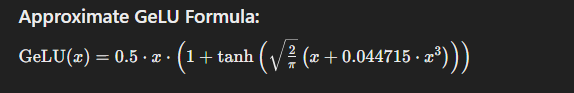

### Derivative of Approximate GeLU 

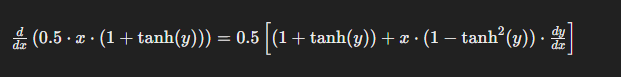

In [16]:
import math
def init_params():
    w1 = np.random.rand(10,784) - 0.5 # 784 different values for 10 neuron
    b1 = np.random.rand(10,1) - 0.5  # 1 bias for each neuron
    w2 = np.random.rand(10,10) - 0.5 # 10 weights for each neuron of output layer 
    b2 = np.random.rand(10,1) - 0.5 # 1 bias for each neuron of ouput layer


#     k = 1
    k = 5
    w1 = np.random.randn(10,784)/k
    b1 = np.random.randn(10,1)/k
    w2 = np.random.randn(10,10)/k
    b2 = np.random.randn(10,1)/k
    

    return w1,b1,w2,b2


w = init_params()
print(max(w[0][0]),min(w[0][0]),np.size(w[0][0]))
# max and min values of first neuron of first layer (dimentions  = 784 x 1)

# Ouput if k = 1
# 3.4265582256027436 -3.2656597944363455 784

0.6118147427535802 -0.5778498225615706 784


## For np.random.rand(10,784)
> 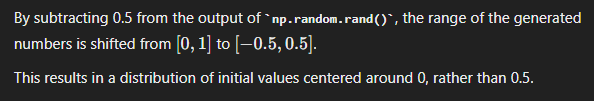
## 
## For np.random.randn(10,784)
> ##  But in case of randn int will initially make the higher or lower weights. which will lead to Vanishing or Exploding Gradients problem so we can do two things
> ### 1) Either Increase the Learning rates (But this will lead to vanishing gradients)
> ### 2) or We shift the standard deviation of randn initialization by dividing using positigve integer (k>2)

In [20]:


# 0.5(1 + tanh) + 0.5*z((dr(z)e**z) + dr(z)e**(-z))

def ReLU(z):
    return np.maximum(z,0)

def derive_ReLU(z):
    return z>0

def GeLU(z):
    ez = np.exp(np.sqrt(2 / np.pi) * (z + 0.044715 * z**3))
    enz = np.exp(-np.sqrt(2 / np.pi) * (z + 0.044715 * z**3))
    tanh = (ez - enz) / (ez + enz)
    return 0.5 * z * (1 + tanh)

def derive_GeLU(z):
    dr = np.sqrt(2 / np.pi) * (1 + 3 * 0.044715 * z**2)
    ez = np.exp(np.sqrt(2 / np.pi) * (z + 0.044715 * z**3))
    enz = np.exp(-np.sqrt(2 / np.pi) * (z + 0.044715 * z**3))
    tanh = (ez - enz) / (ez + enz)
    tanh2 = tanh**2
    return 0.5 * ((1 + tanh) + z * (1 - tanh2) * dr)

def softmax(l):
    A = np.exp(l)/sum(np.exp(l))
    return A
  

def forward_prop(w1,b1,w2,b2,X):
    z1 = w1.dot(X) +  b1
    a1 = GeLU(z1)
    z2 = w2.dot(a1) + b2
    a2 = softmax(z2)
    return z1,a1,z2,a2
    
def one_hot(Y):
    one_hot_y = np.zeros((Y.size,Y.max() + 1))
    one_hot_y[np.arange(Y.size),Y] = 1
    one_hot_y = one_hot_y.T
    return one_hot_y



def back_prop(z1,a1,z2,a2,w1,w2,x,y):
    one_hot_y = one_hot(y)
    dz2 = a2 - one_hot_y
    dw2 = 1 / m * dz2.dot(a1.T)
    db2 = 1 / m * np.sum(dz2)
    dz1 = w2.T.dot(dz2) *  derive_GeLU(z1)
    dw1 = 1 / m * dz1.dot(x.T)
    db1 = 1 / m * np.sum(dz1)
    return dw1,db1,dw2,db2
    

def update_params(w1,b1,w2,b2, dw1,db1,dw2,db2,alpha):
    w1 = w1 - alpha * dw1
    b1 = b1 - alpha * db1
    w2 = w2 - alpha * dw2
    b2 = b2 - alpha * db2
    return w1,b1,w2,b2

In [21]:
def get_predictions(a2):
    return np.argmax(a2,0)

def get_accuracy(predictions,y):
    print(predictions,y)
    return np.sum(predictions==y)/y.size

def gradient_descent(x,y,iterations,alpha):
    w1,b1,w2,b2 = init_params()
    for i in range(iterations):
        z1,a1,z2,a2 = forward_prop(w1,b1,w2,b2,x)
        dw1,db1,dw2,db2 = back_prop(z1,a1,z2,a2,w1,w2,x,y)
        w1,b1,w2,b2 = update_params(w1,b1,w2,b2,dw1,db1,dw2,db2,alpha)
        if i % 50==0:
            print("Iteration:",i)
            print("Acuuracy:", get_accuracy(get_predictions(a2),y))
    return w1,b1,w2,b2

In [22]:
w1,b1,w2,b2 = gradient_descent(X_train,Y_train,500,0.1)

Iteration: 0
[2 5 7 ... 0 2 2] [4 8 8 ... 7 3 2]
Acuuracy: 0.08380487804878049
Iteration: 50
[4 8 3 ... 7 3 2] [4 8 8 ... 7 3 2]
Acuuracy: 0.46490243902439027
Iteration: 100
[4 8 3 ... 7 3 2] [4 8 8 ... 7 3 2]
Acuuracy: 0.7042195121951219
Iteration: 150
[4 8 3 ... 7 3 2] [4 8 8 ... 7 3 2]
Acuuracy: 0.7735609756097561
Iteration: 200
[4 8 8 ... 7 3 2] [4 8 8 ... 7 3 2]
Acuuracy: 0.8078536585365854
Iteration: 250
[4 8 8 ... 7 3 2] [4 8 8 ... 7 3 2]
Acuuracy: 0.8278536585365853
Iteration: 300
[4 8 8 ... 7 3 2] [4 8 8 ... 7 3 2]
Acuuracy: 0.8428780487804878
Iteration: 350
[4 8 8 ... 7 3 2] [4 8 8 ... 7 3 2]
Acuuracy: 0.8539024390243902
Iteration: 400
[4 8 8 ... 7 3 2] [4 8 8 ... 7 3 2]
Acuuracy: 0.8610243902439024
Iteration: 450
[4 8 8 ... 7 3 2] [4 8 8 ... 7 3 2]
Acuuracy: 0.8668780487804878


In [19]:
def GeLU(z):
    ez = np.exp(np.sqrt(2 / np.pi) * (z + 0.044715 * z**3))
    enz = np.exp(-np.sqrt(2 / np.pi) * (z + 0.044715 * z**3))
    tanh = (ez - enz) / (ez + enz)
    return 0.5 * z * (1 + tanh)

def derive_GeLU(z):
    dr = np.sqrt(2 / np.pi) * (1 + 3 * 0.044715 * z**2)
    ez = np.exp(np.sqrt(2 / np.pi) * (z + 0.044715 * z**3))
    enz = np.exp(-np.sqrt(2 / np.pi) * (z + 0.044715 * z**3))
    tanh = (ez - enz) / (ez + enz)
    tanh2 = tanh**2
    return 0.5 * ((1 + tanh) + z * (1 - tanh2) * dr)


In [23]:
w1,b1,w2,b2 = gradient_descent(X_train,Y_train,500,0.1)

Iteration: 0
[5 8 5 ... 5 5 5] [4 8 8 ... 7 3 2]
Acuuracy: 0.10148780487804879
Iteration: 50
[4 3 3 ... 7 3 2] [4 8 8 ... 7 3 2]
Acuuracy: 0.4735853658536585
Iteration: 100
[4 3 8 ... 7 3 2] [4 8 8 ... 7 3 2]
Acuuracy: 0.6784634146341464
Iteration: 150
[4 3 8 ... 7 3 2] [4 8 8 ... 7 3 2]
Acuuracy: 0.7571707317073171
Iteration: 200
[4 3 8 ... 7 3 2] [4 8 8 ... 7 3 2]
Acuuracy: 0.7957073170731708
Iteration: 250
[4 8 8 ... 7 3 2] [4 8 8 ... 7 3 2]
Acuuracy: 0.8182926829268292
Iteration: 300
[4 8 8 ... 7 3 2] [4 8 8 ... 7 3 2]
Acuuracy: 0.8327560975609756
Iteration: 350
[4 8 8 ... 7 3 2] [4 8 8 ... 7 3 2]
Acuuracy: 0.843609756097561
Iteration: 400
[4 8 8 ... 7 3 2] [4 8 8 ... 7 3 2]
Acuuracy: 0.8521463414634146
Iteration: 450
[4 8 8 ... 7 3 2] [4 8 8 ... 7 3 2]
Acuuracy: 0.8589512195121951
